<h1>Chapter 8 - Model-agnostic versus Model-specific Explainability </h1>
<p>This notebook is a reference for model-agnostic method - Kernel SHAP
<p>Author: Cher Simon

In [1]:
#install SHAP
!pip install shap

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p38/bin/python -m pip install --upgrade pip' command.


In [2]:
#load libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import shap

In [3]:
#load dataset
df = pd.read_csv('./titanic.csv')
df = df.dropna()
clean_cols = {"Embarked": {"Q": 0, "S": 1, "C": 2}}
df = df.replace(clean_cols)
df

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,58.0,0,1,512.3292,2,1
1,1,28.0,3,2,263.0000,1,1
2,1,60.0,1,4,263.0000,1,1
3,1,48.0,1,3,262.3750,2,1
4,1,36.0,0,0,262.3750,2,1
...,...,...,...,...,...,...,...
408,3,47.0,1,0,7.0000,1,1
410,3,30.0,0,0,6.9500,0,1
411,3,21.0,1,0,6.4958,1,0
414,3,9.0,0,1,3.1708,1,0


In [4]:
#convert dataset into array
dataset = df.values
dataset

array([[  1.    ,  58.    ,   0.    , ..., 512.3292,   2.    ,   1.    ],
       [  1.    ,  28.    ,   3.    , ..., 263.    ,   1.    ,   1.    ],
       [  1.    ,  60.    ,   1.    , ..., 263.    ,   1.    ,   1.    ],
       ...,
       [  3.    ,  21.    ,   1.    , ...,   6.4958,   1.    ,   0.    ],
       [  3.    ,   9.    ,   0.    , ...,   3.1708,   1.    ,   0.    ],
       [  1.    ,  49.    ,   0.    , ...,   0.    ,   1.    ,   0.    ]])

In [5]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']

In [6]:
#assign features and target to variables
X = dataset[:, 0:6]
y = dataset[:, 6]

In [7]:
#split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

In [8]:
#Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

2022-09-17 15:53:53.505705: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-17 15:53:53.505751: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-184-4.ec2.internal): /proc/driver/nvidia/version does not exist
2022-09-17 15:53:53.506676: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
#Compile model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

m = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 10.1376 - accuracy: 0.5644 - precision: 0.4175 - recall: 0.4388
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 1.0557 - accuracy: 0.4924 - precision: 0.3525 - recall: 0.4388
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.6174 - precision: 0.4651 - recall: 0.2041
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6364 - precision: 0.5333 - recall: 0.1633    
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.6477 - precision: 0.6190 - recall: 0.1327
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6288 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.6515 - precision: 0.6875 - recall: 0.1122    
Epoch 8/100
9/9 [============================

In [10]:
e = shap.KernelExplainer(model, X_train)
shap_values = e.shap_values(X_test)

Using 264 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/67 [00:00<?, ?it/s]

In [11]:
#visualize a single prediction's explanation with a force plot
shap.initjs()
shap.force_plot(e.expected_value[0], shap_values[0][1], features = features)

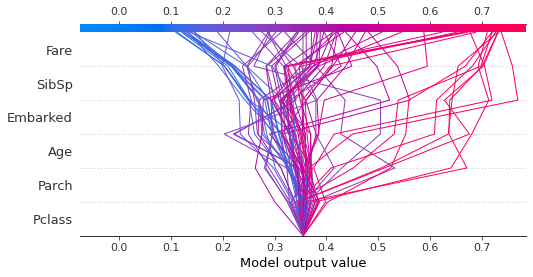

In [12]:
#visualize a decision_plot
shap.decision_plot(e.expected_value, shap_values[0][:67],feature_names=features)